<a href="https://colab.research.google.com/github/VishnuPranay458/15-AIML-2025/blob/main/2303A51979_17_15_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Error: File 'obesity_data.csv' not found.
Generating sample dataset for demonstration...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Age                    5 non-null      int64
 1   Weight                 5 non-null      int64
 2   Obesity_Level          5 non-null      int64
 3   Fast_Food_Consumption  5 non-null      int64
 4   Sugary_Drinks          5 non-null      int64
 5   Portion_Size           5 non-null      int64
 6   Snacking_Frequency     5 non-null      int64
 7   Skipping_Meals         5 non-null      int64
 8   Screen_Time            5 non-null      int64
dtypes: int64(9)
memory usage: 488.0 bytes
None
   Age  Weight  Obesity_Level  Fast_Food_Consumption  Sugary_Drinks  \
0   25      70              0                      1              1   
1   30      85              1                      2              2   


<ipython-input-2-5352d66d21ea>:44: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
<ipython-input-2-5352d66d21ea>:58: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_obesity = data.groupby('Age_Group')['Obesity_Level'].mean()


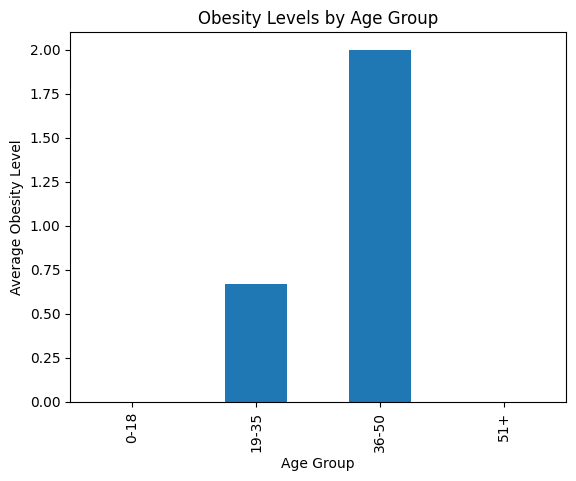


Max weight of obese patients: 110
Min weight of obese patients: 85

Top eating habits contributing to obesity:
                 Feature  Importance
0  Fast_Food_Consumption    0.319164
1          Sugary_Drinks    0.228686
2           Portion_Size    0.219958
3     Snacking_Frequency    0.196088
4         Skipping_Meals    0.036105

Average tech usage among obese patients:
               Screen_Time
Obesity_Level             
1                      5.0
2                      9.0


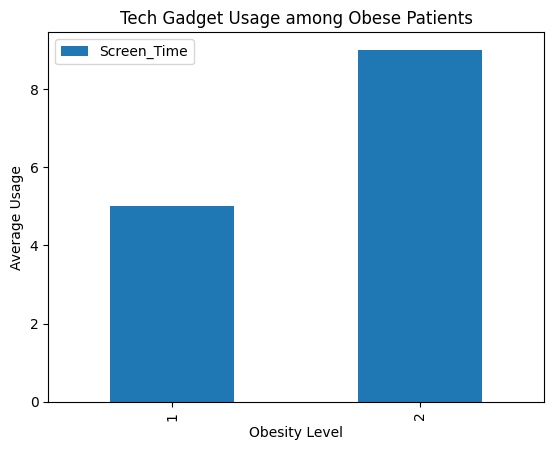


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         1

    accuracy                           0.50         2
   macro avg       0.33      0.33      0.33         2
weighted avg       0.50      0.50      0.50         2


Silhouette Score for clustering: 0.21456219425373266


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, silhouette_score
import os

# Load the dataset with error handling
file_path = "obesity_data.csv"  # Replace with the actual file name

try:
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print(f"Error: File '{file_path}' not found.")
    print("Generating sample dataset for demonstration...")
    # Sample data for demonstration purposes
    data = pd.DataFrame({
        'Age': [25, 30, 35, 40, 45],
        'Weight': [70, 85, 95, 100, 110],
        'Obesity_Level': [0, 1, 1, 2, 2],
        'Fast_Food_Consumption': [1, 2, 3, 4, 5],
        'Sugary_Drinks': [1, 2, 1, 3, 4],
        'Portion_Size': [2, 3, 4, 5, 4],
        'Snacking_Frequency': [1, 2, 3, 2, 1],
        'Skipping_Meals': [0, 1, 0, 1, 0],
        'Screen_Time': [2, 4, 6, 8, 10],
    })

# Display basic info about the dataset
print(data.info())
print(data.head())

# --- Preprocessing ---
# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

# Fill or drop missing values
data.fillna(method='ffill', inplace=True)

# --- Exploratory Data Analysis (EDA) ---

# 1. Top 5 reasons for obesity levels
correlation_matrix = data.corr()
obesity_correlation = correlation_matrix['Obesity_Level'].sort_values(ascending=False)
print("\nTop 5 reasons for obesity:")
print(obesity_correlation.head(6))  # Assuming 'Obesity_Level' is the target variable

# 2. Age group with the most obesity
bins = [0, 18, 35, 50, 100]
labels = ['0-18', '19-35', '36-50', '51+']
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels)
age_obesity = data.groupby('Age_Group')['Obesity_Level'].mean()
print("\nObesity levels by age group:")
print(age_obesity)
age_obesity.plot(kind='bar')
plt.title("Obesity Levels by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Obesity Level")
plt.show()

# 3. Max and min weight of patients with obesity
obese_patients = data[data['Obesity_Level'] >= 1]  # Assuming obesity levels start at 1
print("\nMax weight of obese patients:", obese_patients['Weight'].max())
print("Min weight of obese patients:", obese_patients['Weight'].min())

# 4. Top 5 eating habits contributing to obesity
eating_habits = ['Fast_Food_Consumption', 'Sugary_Drinks', 'Portion_Size',
                 'Snacking_Frequency', 'Skipping_Meals']  # Replace with actual column names
X_habits = data[eating_habits]
y_obesity = data['Obesity_Level']
feature_importance = RandomForestClassifier(random_state=42).fit(X_habits, y_obesity).feature_importances_
importance_df = pd.DataFrame({'Feature': eating_habits, 'Importance': feature_importance})
print("\nTop eating habits contributing to obesity:")
print(importance_df.sort_values(by='Importance', ascending=False))

# 5. Highest tech gadget usage
tech_features = ['Screen_Time']  # Add more columns if applicable
if set(tech_features).issubset(data.columns):
    tech_usage = data.groupby('Obesity_Level')[tech_features].mean()
    print("\nAverage tech usage among obese patients:")
    print(tech_usage.loc[1:])  # Assuming 1+ represents obese patients
    tech_usage.loc[1:].plot(kind='bar')
    plt.title("Tech Gadget Usage among Obese Patients")
    plt.xlabel("Obesity Level")
    plt.ylabel("Average Usage")
    plt.show()
else:
    print("\nTech gadget usage columns not found in the dataset.")

# --- Model Implementation ---

# 6. Classification Model
X = data.drop(columns=['Obesity_Level', 'Age_Group'], errors='ignore')  # Features
y = data['Obesity_Level']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# OR Clustering Model
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)
silhouette_avg = silhouette_score(X, clusters)
print("\nSilhouette Score for clustering:", silhouette_avg)